##Importações e instalações necessárias

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
!pip install fasttext
import fasttext
from sklearn.decomposition import PCA

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

#Preparando os dados




In [6]:
dataset = pd.read_excel("/content/drive/MyDrive/LCCV/Clusterização/licoes_aprendidas.xlsx")

dataset = dataset.drop_duplicates()
dataset = dataset.dropna()
strings = dataset['textos'].tolist()
strings = [item.strip() for item in strings if (item.strip() != "")]


def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('portuguese') + list(string.punctuation))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

preprocessed_strings = [preprocess_text(text) for text in strings]

#Vetorização utilizando o FastText

In [7]:
def create_training_file(texts, filename):
    with open(filename, 'w', encoding='utf-8') as f:
        for text in texts:
            f.write(text + '\n')

create_training_file(preprocessed_strings, 'treinamento.txt')
model = fasttext.train_unsupervised('treinamento.txt')

vetores_ft = []
for sentenca in preprocessed_strings:
    vetor = model.get_sentence_vector(sentenca)
    vetores_ft.append(vetor)

# DBSCAN

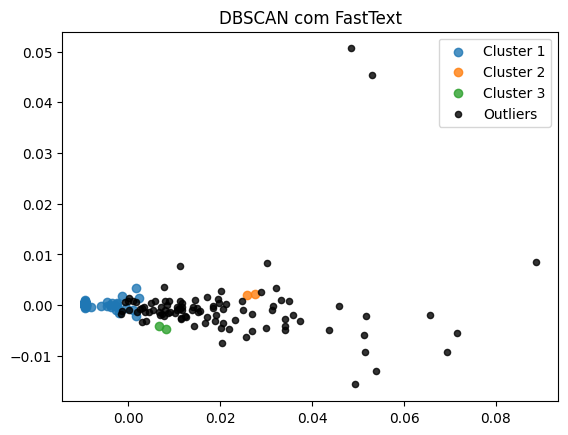

In [20]:
# Aplicar o DBSCAN
dbscan = DBSCAN(eps=0.01, min_samples=2)
labels = dbscan.fit_predict(vetores_ft)

# Transformar a matriz em 2 colunas
pca = PCA(n_components=2)
matriz_reduzida_ft = pca.fit_transform(vetores_ft)

for label in set(labels):
    if label == -1:
        plt.scatter(matriz_reduzida_ft[labels == label, 0], matriz_reduzida_ft[labels == label, 1], c='black', label='Outliers', s=20, alpha=0.8)
    else:
        plt.scatter(matriz_reduzida_ft[labels == label, 0], matriz_reduzida_ft[labels == label, 1], label='Cluster {}'.format(label+1), alpha=0.8)

plt.title('DBSCAN com FastText')
plt.legend()
plt.show()

###Zoom na região concentrada de dados

In [21]:
# for label in set(labels):
#     if label == -1:
#         plt.scatter(matriz_reduzida_ft[labels == label, 0], matriz_reduzida_ft[labels == label, 1], c='black', label='Outliers', s=20, alpha=0.8)
#     else:
#         plt.scatter(matriz_reduzida_ft[labels == label, 0], matriz_reduzida_ft[labels == label, 1], label='Cluster {}'.format(label+1), alpha=0.8)

# plt.title('Região concentrada')
# xmin, xmax = -0.02, 0.06
# ymin, ymax = -0.05, 0.05
# plt.xlim(xmin, xmax)
# plt.ylim(ymin, ymax)
# plt.legend()
# plt.show()

###Observando sentenças de cada cluster

In [ ]:
cluster_desejado = 0
# plt.figure(figsize=(8, 6))

# pontos_cluster_desejado = matriz_reduzida_ft[labels == cluster_desejado]

# plt.scatter(pontos_cluster_desejado[:, 0], pontos_cluster_desejado[:, 1], label='Cluster {}'.format(cluster_desejado))

# plt.xlabel('Componente Principal 1')
# plt.ylabel('Componente Principal 2')
# plt.title('Gráfico do Cluster {}'.format(cluster_desejado))
# plt.legend()
# plt.show()

# Imprimir as sentenças do cluster desejado
sentencas_cluster_desejado = [strings[i] for i in range(len(strings)) if (labels[i] + 1) == cluster_desejado]

for sentenca in sentencas_cluster_desejado:
  print(sentenca)
  print("------------------------------------------------------------------------------------------------------------------------------------------------------------------")

#K-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


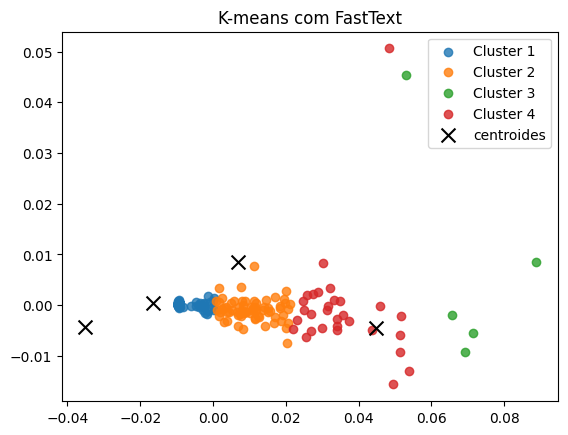

In [28]:
# Criação do objeto KMeans
kmeans = KMeans(n_clusters=4, random_state=0)

# Ajuste do modelo aos dados
kmeans.fit(vetores_ft)

# Obtenção das etiquetas dos clusters
labels = kmeans.labels_

# Obtenção das coordenadas dos centróides
centroids = kmeans.cluster_centers_

# Transformar a matriz em 2 colunas
pca = PCA(n_components=2)
matriz_reduzida_ft = pca.fit_transform(vetores_ft)

# Transformar centroids em 2 colunas
centroids_reduzidos = pca.fit_transform(centroids)

for label in set(labels):
    if label == -1:
        plt.scatter(matriz_reduzida_ft[labels == label, 0], matriz_reduzida_ft[labels == label, 1], c='black', label='Outliers', s=20, alpha=0.8)
    else:
        plt.scatter(matriz_reduzida_ft[labels == label, 0], matriz_reduzida_ft[labels == label, 1], label='Cluster {}'.format(label+1), alpha=0.8)

# Plot dos centróides
plt.scatter(centroids_reduzidos[:, 0], centroids_reduzidos[:, 1], marker='x', color='black', s=100, label='centroides')

plt.title('K-means com FastText')
plt.legend()
plt.show()

###Zoom na região concentrada de dados

In [18]:
# for label in set(labels):
#     if label == -1:
#         plt.scatter(matriz_reduzida_ft[labels == label, 0], matriz_reduzida_ft[labels == label, 1], c='black', label='Outliers', s=20, alpha=0.8)
#     else:
#         plt.scatter(matriz_reduzida_ft[labels == label, 0], matriz_reduzida_ft[labels == label, 1], label='Cluster {}'.format(label + 1), alpha=0.8)

# plt.title('Região concentrada')
# xmin, xmax = -0.02, 0.08
# ymin, ymax = -0.05, 0.05
# plt.xlim(xmin, xmax)
# plt.ylim(ymin, ymax)
# plt.legend()
# plt.show()

###Observando sentenças de cada cluster

In [ ]:
cluster_desejado = 1

# Imprimir as sentenças do cluster desejado
sentencas_cluster_desejado = [strings[i] for i in range(len(strings)) if (labels[i] + 1) == cluster_desejado]

for sentenca in sentencas_cluster_desejado:
  print(sentenca)
  print("------------------------------------------------------------------------------------------------------------------------------------------------------------------")

# pontos_cluster_desejado = matriz_reduzida_ft[labels == cluster_desejado]

# plt.scatter(pontos_cluster_desejado[:, 0], pontos_cluster_desejado[:, 1], label='Cluster {}'.format(cluster_desejado))
# plt.title('Gráfico do Cluster {}'.format(cluster_desejado))
# plt.legend()
# plt.show()

#K-medoids

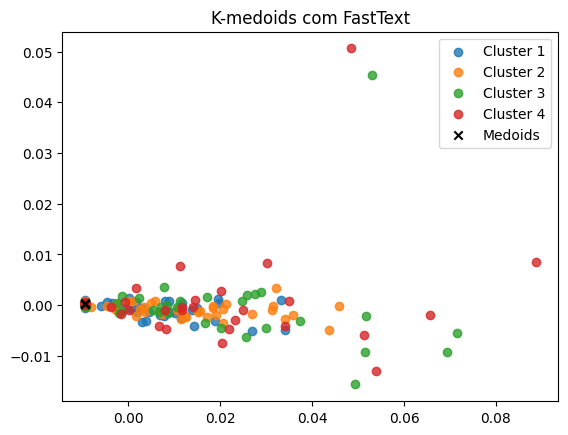

In [11]:
kmedoids = KMedoids(n_clusters=4, random_state=0)
kmedoids.fit(vetores_ft)
labels = kmedoids.labels_
medoids = kmedoids.medoid_indices_

pca = PCA(n_components=2)
matriz_reduzida_ft = pca.fit_transform(vetores_ft)

medoids_coords = matriz_reduzida_ft[medoids]

for label in set(labels):
    if label == -1:
        plt.scatter(matriz_reduzida_ft[labels == label, 0], matriz_reduzida_ft[labels == label, 1], c='black', label='Outliers', s=20, alpha=0.8)
    else:
        plt.scatter(matriz_reduzida_ft[labels == label, 0], matriz_reduzida_ft[labels == label, 1], label='Cluster {}'.format(label+1), alpha=0.8)

plt.scatter(medoids_coords[:, 0], medoids_coords[:, 1], c='black', marker='x', label='Medoids')

plt.title('K-medoids com FastText')
plt.legend()
plt.show()

###Zoom na região concentrada de dados

In [17]:
# for label in set(labels):
#     if label == -1:
#         plt.scatter(matriz_reduzida_ft[labels == label, 0], matriz_reduzida_ft[labels == label, 1], c='black', label='Outliers', s=20, alpha=0.8)
#     else:
#         plt.scatter(matriz_reduzida_ft[labels == label, 0], matriz_reduzida_ft[labels == label, 1], label='Cluster {}'.format(label+1), alpha=0.8)

# plt.scatter(medoids_coords[:, 0], medoids_coords[:, 1], c='black', marker='x', label='Medoids')

# plt.title('Região concentrada')
# xmin, xmax = -0.02, 0.06
# ymin, ymax = -0.05, 0.05
# plt.xlim(xmin, xmax)
# plt.ylim(ymin, ymax)
# plt.legend()
# plt.show()

###Observando sentenças de cada cluster

In [ ]:
cluster_desejado = 4
sentencas_cluster_desejado = [strings[i] for i in range(len(strings)) if (labels[i] + 1) == cluster_desejado]

for sentenca in sentencas_cluster_desejado:
  print(sentenca)
  print("------------------------------------------------------------------------------------------------------------------------------------------------------------------")

# pontos_cluster_desejado = matriz_reduzida_ft[labels == cluster_desejado]

# plt.scatter(pontos_cluster_desejado[:, 0], pontos_cluster_desejado[:, 1], label='Cluster {}'.format(cluster_desejado))
# plt.title('Gráfico do Cluster {}'.format(cluster_desejado))
# plt.legend()
# plt.show()